<h1 align = center> 100 Days of Machine Learning - Day 10

100 days of machine learning is a tech challenge where the participants spend 100 continuous days studying, learning and coding machine learning concepts. It involves dedicating a certain amount of time each day to engage in ML-related activities, such as reading books, watching tutorials, completing online courses, working on projects, or participating in coding exercises. The goal is to develop a consistent learning habit and make significant progress in ML skills over the course of 100 days.

<b> Note : This notebook is continued from Day 9 </b>

# Table of Contents

- Decision Trees


# Decision Trees

Decision Trees (DTs) are supervised learning algorithms. They are used for classification as well as regression tasks. As their name suggests, Decision *Trees* have a tree-like structure which comprises of root node, branch nodes and leaf nodes. This structure is heirarichal in nature.

<div align = "center"> <img src = "https://www.mastersindatascience.org/wp-content/uploads/sites/54/2022/05/tree-graphic.jpg" height = 500px> </div>

The approach behind decision trees is basic but is really effective for a lot of scenarios. A decision tree splits a problem into a number of decisions based on the input features and the target variable. These splits are represented by the root node splitting into several branch nodes, and those branch nodes splitting even further till a leaf node or output is met. This is similar to a biological tree where water from the soil starts from the roots, is transported into either branches depending on where the water is needed, and ends up in a leaf for photosynthesis.

## Components of a Decision Tree

A decision tree has several components like Root node, Branches, Decision Nodes and Leaf nodes - let's discuss them one by one.

- Root Node : A root node is the node/point of origin for the entire decision tree. A root node represents the entire population sample/dataset and the branch nodes originating from the root node then divide this dataset into 2 or more subsets.

- Decision Node : A decision node is one that symbolizes a choice regarding a specific input feature or question asked. There may be two or more choice sprouting from such a node.

- Branch : A branch is a section of a tree that is formed by "splitting" the tree from a decision node or a root node.

- Leaf Node : Also called a "terminal" node, it is a node that does not have any child node ; i.e. ; it does not split into branches/further nodes. The leaf node represents a final outcome. 


Now, you can do various things with these components of decision trees : 

- Pruning : It refers to cutting down nodes/branches that do not provide any additional information or value for the purpose of preventing model overfitting.

<div align = "center">

<img src = "https://upload.wikimedia.org/wikipedia/commons/2/23/Before_after_pruning.png" height = 200px>

</div>
- Splitting : Splitting a decision tree refers to the process of creating branches or sub-trees from a decision node. The act of splitting is done depending on the features, dataset and problem at hand.

<div align = "center">
<img src = "https://i.ytimg.com/vi/gqlWi4HjRYI/maxresdefault.jpg" height = 300px>
<div>




It is important to note that decision trees follow a [Sum-of-Product](https://www.electronics-tutorials.ws/boolean/sum-of-product.html) or Disjunctive Normal Form. 





## How do Decision Trees work?

The main motive of a decision tree classifier is to select which attributes or features it needs to make a decision upon, or make them a root node. There are several methods to do this and these are called "Attribute Selection Measures" or ASM. ASM can be understood as metrics that help define the usefulness of a feature while we split the dataset for decision-making. This is usually done by gauging the amount of raw information a feature provides in relation with a target variable. 

Decision trees aim to maximize the information gained while splitting the data - this means if the data is correctly split - the groups that the data is split into will become more and more homogenous. A decision tree algorithm repeats this process of splitting till an acceptable level of homogenity is reached allowing the algorithm to classify unknown data points into correct classes.

## Attribute Selection Measures

If we randomly start to pick features in a decision tree using a brute force approach, it would take a lot of time and iterations to find the right dataset split and nodes, possibly even resulting in bad accuracy. This is why we instead use attribute selection methods to find features to select as a decision node. ASM are a set of criteria that one can use to better identify the right features over iterations of building the decision tree.


Such criteria are : 

- Entropy
- Information Gain
- Gini Index
- Chi Square Method
- Fisher's Index
- Variance Reduction

A lot of commonly used feature selection techniques are utilized to select attributes. These techniques are explained [here](https://github.com/snowclipsed/100daysofml/blob/main/Day%206/Day%206.ipynb)



Let's discuss these concepts in relation to the decision tree method.


### Entropy in Decision Trees

Entropy can be called a measure of randomness in a dataset or subset of the dataset. When we are talking about entropy in decision trees, it refers to how randomly spread classes are inside the data. Therefore it allows us to understand if a split made by the decision tree algorithm is "pure" or not. Purity of a split refers to how homogenous the split occuring is and how uncertain it is while decision making. 


In the ID3 decision tree algorithm, any decision tree node with an entropy of zero will be considered as a leaf node, and those with an entropy >0 will need further splitting till they are also zero.

 <div align = "center"> <img src = "https://d1rwhvwstyk9gu.cloudfront.net/2022/10/Entropy.png" height = 200px> </div>

### Information Gain in Decision Trees

Information gain refers to how much uncertainty a split causes the dataset to lose. It is a measure of reduction in randomness and is tied to entropy. It allows us to guage how homogenous a dataset split is. Therefore, information gain is indirectly propotional to entropy. 

### Gini Index 

The Gini index essentially functions as the cost function of the decision tree splitting algorithm. The aim for using the Gini index is to reduce the amount of impurities in a split. Gini index can be given by : 


$$ Gini = 1 - \sum_{1 = 1}^{n} (p_i)^2



where pi is the probability of an object being identified as a specific class. 

If we obtain a high Gini index, it means high amounts of heterogenity in the split. This is why we aim for low Gini index scores.


A popular decision tree algorithm CART (Classification and Regression Tree) utilizes Gini Index to create splits. 


## Pruning

After the full decision tree is formed, we prune some branches which are 'redundant' from the decision tree to prevent any sort of overfitting. This is done by using a training and validation split in the dataset. We first build a decision tree according to the training set and then trim the tree according to validation set.

# Implementation

It is finally time to implement Decision Tree algorithms into practice!!

Let's import our dataset, the famous Titanic dataset on Kaggle

In [2]:
# Imports needed for the script
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

# Loading the data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Store our test passenger IDs for easy access
PassengerId = test['PassengerId']

# Showing overview of the train dataset
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Let's look to do some feature engineering here.

I'll copy the approach taken by [Deigo Milla](https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset/notebook) in their notebook, which references these ideas :


[Notebook by Anisotropic](https://www.kaggle.com/code/arthurtok/introduction-to-ensembling-stacking-in-python)
[Notebook by Sina](https://www.kaggle.com/code/sinakhorami/titanic-best-working-classifier)
[Notebook by Meg](https://www.kaggle.com/code/mrisdal/exploring-survival-on-the-titanic)

We can see that the fields *Name and PassengerId* are unique values, *Survived, Pclass, Sex, Embarked* are categorical and *Age, SibSp, Parch, Ticket, Fare* are continuous. 



In [3]:
# Copy original dataset in case we need it later when digging into interesting features
# WARNING: Beware of actually copying the dataframe instead of just referencing it
# "original_train = train" will create a reference to the train variable (changes in 'train' will apply to 'original_train')
original_train = train.copy() # Using 'copy()' allows to clone the dataset, creating a different object with the same values

# Feature engineering steps taken from Sina and Anisotropic, with minor changes to avoid warnings
full_data = [train, test]

# Feature that tells whether a passenger had a cabin on the Titanic
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
# Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Remove all NULLS in the Fare column
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

# Remove all NULLS in the Age column
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    # Next line has been improved to avoid warning
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] ;
# Feature selection: remove variables no longer containing relevant information
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

Here's how our train dataset looks like now, with all features converted to categorical or ordinal values

In [4]:
train.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4
3,1,1,0,2,0,3,0,1,2,0,3
4,0,3,1,2,0,1,0,0,1,1,1


Let's look at the correlation matrix (through the Pearson's correlation visualization)

<Axes: title={'center': 'Feature Correlation (Pearson)'}>

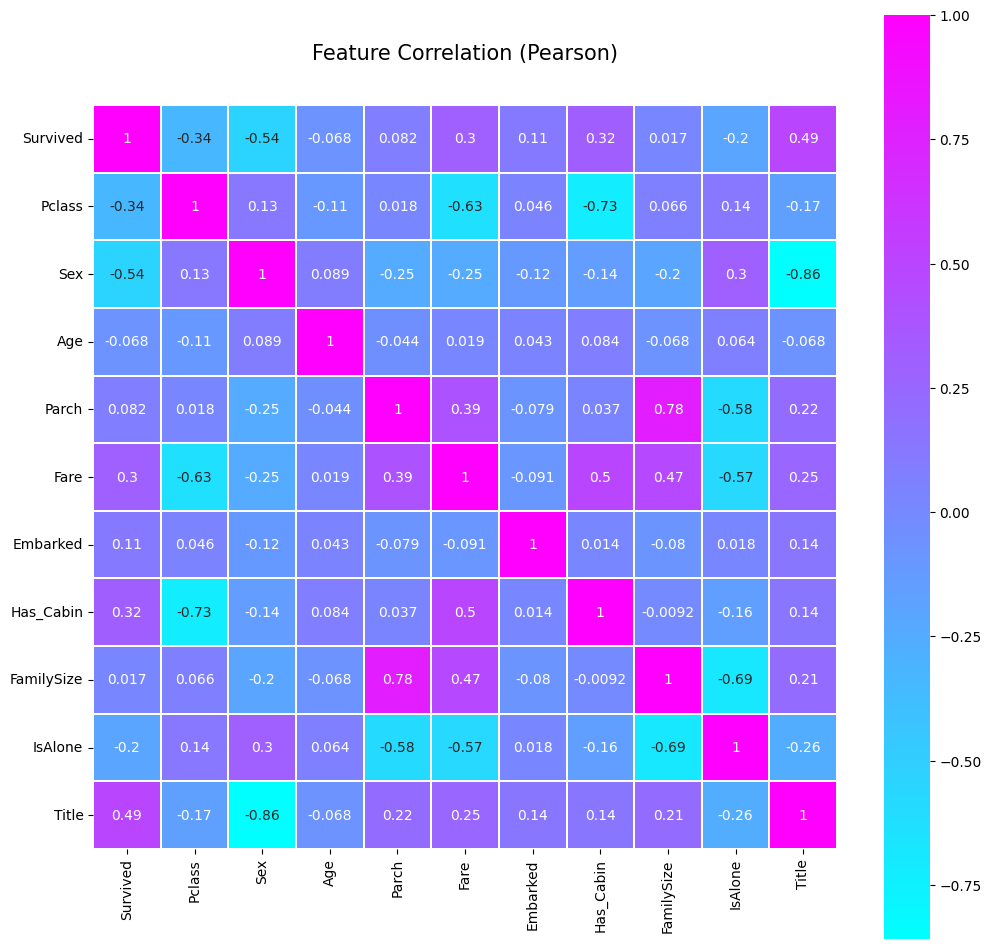

In [5]:
colormap = plt.cm.cool
plt.figure(figsize=(12,12))
plt.title('Feature Correlation (Pearson)', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

We observe that Fields like *Title, Sex, PClass and Has_Cabin* show higher correlation with the target variable (survived)


Now, let's build the decision tree.

We will use sklearn to do this.

In [6]:
y_train = train['Survived']
x_train = train.drop(['Survived'], axis = 1).values
x_test = test.values

decisiontree = tree.DecisionTreeClassifier(max_depth = 3)
decisiontree.fit(x_train,y_train)

y_pred = decisiontree.predict(x_test)
result = pd.DataFrame({
    "PassengerId" : PassengerId,
    "SurvivedPred" : y_pred
})
result.to_csv("result.csv", index = False)

Let's calculate the accuracy of the decision tree:

In [7]:
accuracy = decisiontree.score(x_train, y_train) * 100
accuracy

82.37934904601572